In [ ]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lb
import librosa.display as lbd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hack/csv_data/processed.csv')
df.head()

,start,end,pid,mode,filename,disease,crack_wheeze
0,1.862,5.718,160,mc,160_1b3_Al_mc_AKGC417L_0.wav,COPD,2
1,5.718,9.725,160,mc,160_1b3_Al_mc_AKGC417L_1.wav,COPD,3
2,9.725,13.614,160,mc,160_1b3_Al_mc_AKGC417L_2.wav,COPD,2
3,13.614,17.671,160,mc,160_1b3_Al_mc_AKGC417L_3.wav,COPD,2
4,17.671,19.541,160,mc,160_1b3_Al_mc_AKGC417L_4.wav,COPD,0


In [ ]:
root = '/content/drive/MyDrive/hack/processed_audio_files_no_pad/'

In [ ]:
sr = 16000
maxLen = 7

In [ ]:
#slicing
def audio_slicing(signal, max = 7 * sr):
    if len(signal) > max:
        return signal[:max]
    else:
        return signal

In [ ]:
#duplicated check length
def duplicated_check_length(audio, maxLen=maxLen):
    if len(audio) / sr >= maxLen:
        return audio_slicing(audio)

    else:
        new = np.concatenate((audio, audio))
        return duplicated_check_length(new)

In [ ]:
def duplicated_padding(idx):
    audio_data, _ = lb.load(root + df.loc[idx, 'filename'], sr=sr)
    return (duplicated_check_length(np.concatenate((audio_data, audio_data))))

In [ ]:
duplicated_audio = []
for idx in range(10):
    duplicated_audio.append(duplicated_padding(idx))

In [ ]:
len(duplicated_audio)

10

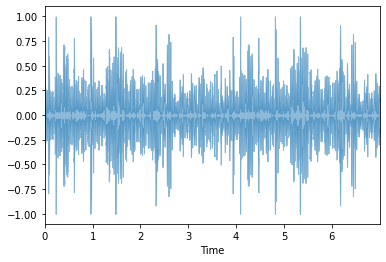

In [ ]:
lbd.waveplot(duplicated_audio[0], sr=sr, alpha=0.5)

In [ ]:
def smart_check_length(new_audio, idx_j, audio_i, audio_j):
    if len(new_audio)/sr >= maxLen:
        return audio_slicing(new_audio)
    else:
        if df['pid'][idx_j] == df['pid'][idx_j+1] and (df.loc[idx_j, 'crack_wheeze'] == df.loc[idx_j+1, 'crack_wheeze'] 
                                                       or df.loc[idx_j+1, 'crack_wheeze'] == 0):
            audio_k, _ = lb.load(root + df.loc[idx_j+1, 'filename'], sr=sr)
            new_audio_1 = np.concatenate((new_audio, audio_k))
            idx_j = idx_j + 1
            return smart_check_length(new_audio_1, idx_j, audio_i, audio_j)
        else: 
            prob = np.random.randint(0,2)
            if prob == 0:
                audio_1 = np.concatenate((new_audio, audio_i))
                return smart_check_length(audio_1, idx_j, audio_i, audio_j)
            else:
                audio_2 = np.concatenate((new_audio, audio_j))
                return smart_check_length(audio_2, idx_j, audio_i, audio_j)

In [ ]:
def smart_padding(idx_i, idx_j):
    audio_i, _ = lb.load(root + df.loc[idx_i, 'filename'], sr=sr)
    audio_j, _ = lb.load(root + df.loc[idx_j, 'filename'], sr=sr)
    new_audio = np.concatenate((audio_i, audio_j))
    return smart_check_length(new_audio, idx_j, audio_i, audio_j)

In [ ]:
smart_padding_test=[]
for idx in range(len(df[:10])):
    if df['pid'][idx] == df['pid'][idx+1] and (df.loc[idx, 'crack_wheeze'] == df.loc[idx+1, 'crack_wheeze'] 
                                               or df.loc[idx+1, 'crack_wheeze'] ==0):
        smart_padding_test.append(smart_padding(idx, idx+1))
    else: 
        smart_padding_test.append(duplicated_padding(idx))

In [ ]:
len(smart_padding_test)

10

In [ ]:
org1,_ = lb.load(root + df.loc[2, 'filename'], sr=sr)
org2,_ = lb.load(root + df.loc[3, 'filename'], sr=sr)

<function matplotlib.pyplot.show>

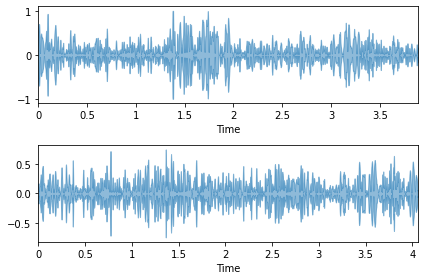

In [ ]:
plt.subplot(2, 1, 1)
lbd.waveplot(org1, sr=sr, alpha=0.5)
plt.subplot(2, 1, 2)
lbd.waveplot(org2, sr=sr, alpha=0.5)
plt.tight_layout()
plt.show

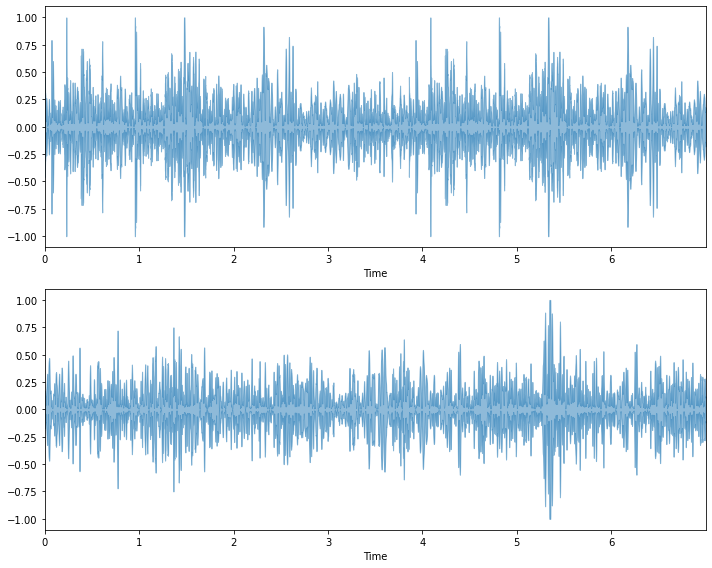

In [ ]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
lbd.waveplot(smart_padding_test[0], sr=sr, alpha=0.5)
plt.subplot(2, 1, 2)
lbd.waveplot(smart_padding_test[3], sr=sr, alpha=0.5)
plt.tight_layout()
plt.show()